In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [3]:

df = pd.read_excel("data/Muesli Project raw data - group 3.xlsx")

In [3]:
# read all the worksheets form the data excel file
df = pd.read_excel('data/Muesli Project raw data - group 3.xlsx', header=1)
df1 = pd.read_excel('data/Muesli Project raw data - group 3.xlsx',sheet_name=1)
df2 = pd.read_excel('data/Muesli Project raw data - group 3.xlsx',sheet_name=2)
df3 = pd.read_excel('data/Muesli Project raw data - group 3.xlsx',sheet_name=3)

In [4]:
# check the df headers
print(df.columns)
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Index(['Order ID', 'Arrival Scan Date', 'Customer Name'], dtype='object')
Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')


In [5]:
# delete unneeded columns
df = df.drop(['Index','Origin Channel', 'Category', 'Sub-Category'], axis=1)
df1 = df1.drop(['Customer Name'], axis=1)
df2 = df2.drop(['Row ID', 'Order Date'], axis=1)

In [6]:
# check the number of rows and columns
print('df=',df.shape)
print('df1=',df1.shape)
print('df2=',df2.shape)
print('df3=',df3.shape)

df= (9994, 15)
df1= (333, 2)
df2= (5899, 3)
df3= (290, 3)


In [7]:
# check for duplicates
print('df=',df.duplicated().value_counts())
print('-' * 30)
print('df1=',df1.duplicated().value_counts())
print('-' * 30)
print('df2=',df2.duplicated().value_counts())
print('-' * 30)
print('df3=',df3.duplicated().value_counts())

df= False    9993
True        1
Name: count, dtype: int64
------------------------------
df1= False    333
Name: count, dtype: int64
------------------------------
df2= False    3003
True     2896
Name: count, dtype: int64
------------------------------
df3= False    204
True      86
Name: count, dtype: int64


In [8]:
# drop the duplicates
df_no_dups = df.drop_duplicates()
df2_no_dups = df2.drop_duplicates()
df3_no_dups = df3.drop_duplicates()

In [9]:
# check the number of rows and columns
print('df_no_dups=', df_no_dups.shape)
print('df1=', df1.shape)
print('df2_no_dups=', df2_no_dups.shape)
print('df3_no_dups=', df3_no_dups.shape)

df_no_dups= (9993, 15)
df1= (333, 2)
df2_no_dups= (3003, 3)
df3_no_dups= (204, 3)


In [10]:
# check the df headers and decide what to merge with what
print(df_no_dups.columns)
print(df1.columns)
print(df2_no_dups.columns)
print(df3_no_dups.columns)

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Index(['Order ID', 'Arrival Scan Date'], dtype='object')
Index(['Order ID', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')


We have to calculate and validate the company assumptions:
1. Preparation process duration from order reception to shipping (2 days): 'Order Date' - 'Ready to Ship Day' (merge df and df3)
2. Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge df2 and df3
3. Efficacy of "Express Processing": the order ought to be on the truck on the ready to ship day
4. From "On Truck Scan" to "Arrival Scan Date"

...and get image of the whole delivery process duration: from 'Order Date' to 'Arrival Scan Date' (merge df and df2)



1. preparation process duration verification

In [11]:
# merge df and df3

df_prep_dur_ver = pd.merge(df_no_dups, df3_no_dups, on='Order ID', how='inner')

In [12]:
# verify the headers of the merged dataframe

df_prep_dur_ver.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Country/Region', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ready to Ship Date', 'Pickup Date'],
      dtype='object')

In [13]:
# delete unneeded columns

df_prep_dur_ver = df_prep_dur_ver.drop(['Ship Mode', 'Country/Region', 'City', 'State', 
                                        'Postal Code', 'Region', 'Product ID', 
                                        'Sales', 'Quantity', 'Discount', 'Profit'], axis=1)

In [14]:
# verify

df_prep_dur_ver.sample(10)

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date
168,CA-2020-157420,2020-11-21,HZ-14950,Henia Zydlo,2020-11-23,2020-11-23
137,CA-2019-158099,2019-09-03,PK-18910,Paul Knutson,2019-09-05,2019-09-06
199,CA-2020-121615,2020-11-03,DL-12925,Daniel Lacy,2020-11-09,2020-11-12
242,CA-2020-152912,2020-11-09,BM-11650,Brian Moss,2020-11-12,2020-11-13
109,US-2020-153948,2020-11-06,FM-14290,Frank Merwin,2020-11-06,2020-11-06
221,CA-2020-105543,2020-11-24,BG-11695,Brooke Gillingham,2020-11-24,2020-11-25
346,CA-2020-113873,2020-11-13,KE-16420,Katrina Edelman,2020-11-19,2020-11-20
123,US-2020-155866,2020-11-17,CC-12370,Christopher Conant,2020-11-23,2020-11-25
196,CA-2020-159597,2020-11-09,MC-17590,Matt Collister,2020-11-16,2020-11-18
305,CA-2020-117702,2020-11-28,LS-16975,Lindsay Shagiari,2020-11-30,2020-12-02


In [15]:

# Get the weekday name from the date column
df_prep_dur_ver['Weekday'] = df_prep_dur_ver['Order Date'].dt.day_name()

# Print the DataFrame with the weekday column
df_prep_dur_ver


,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,Weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday
1,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday
2,CA-2020-135307,2020-11-26,LS-17245,Lynn Smith,2020-11-27,2020-11-27,Thursday
3,CA-2019-102981,2019-09-06,MO-17500,Mary O'Rourke,2019-09-09,2019-09-11,Friday
4,US-2020-155425,2020-11-10,AB-10600,Ann Blume,2020-11-11,2020-11-12,Tuesday
...,...,...,...,...,...,...,...
413,CA-2020-150266,2020-11-25,RO-19780,Rose O'Brian,2020-11-30,2020-12-02,Wednesday
414,CA-2019-106278,2019-09-02,BM-11140,Becky Martin,2019-09-05,2019-09-06,Monday
415,US-2020-165456,2020-11-30,TB-21625,Trudy Brown,2020-12-03,2020-12-04,Monday
416,US-2020-109610,2020-11-25,BS-11590,Brendan Sweed,2020-11-30,2020-12-02,Wednesday


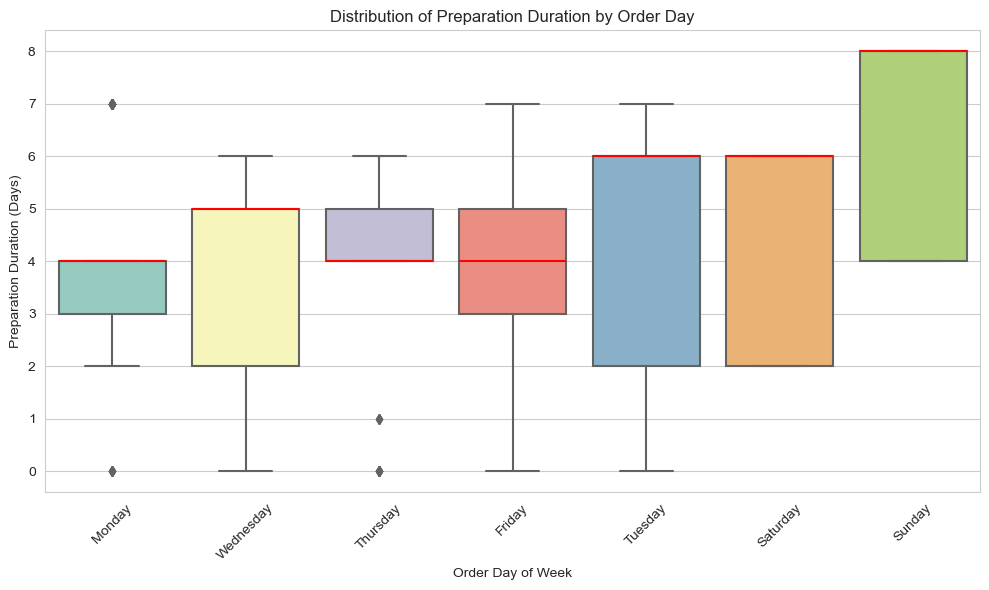

In [16]:
# Convert the date columns to datetime format
df_prep_dur_ver['Order Date'] = pd.to_datetime(df_prep_dur_ver['Order Date'])
df_prep_dur_ver['Ready to Ship Date'] = pd.to_datetime(df_prep_dur_ver['Ready to Ship Date'])
df_prep_dur_ver['Pickup Date'] = pd.to_datetime(df_prep_dur_ver['Pickup Date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['Prep Duration'] = (df_prep_dur_ver['Ready to Ship Date'] - df_prep_dur_ver['Order Date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prep_dur_ver['Order Date'].dt.day_name(), y='Prep Duration', data=df_prep_dur_ver, palette='Set3',
            medianprops=dict(color='red'))
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# check the type of data in the columns

df_prep_dur_ver.dtypes

Order ID                      object
Order Date            datetime64[ns]
Customer ID                   object
Customer Name                 object
Ready to Ship Date    datetime64[ns]
Pickup Date           datetime64[ns]
Weekday                       object
Prep Duration                  int64
dtype: object

In [18]:
# calculate the preparation duration and print it in a new column

df_prep_dur_ver['prep duration'] = df_prep_dur_ver['Ready to Ship Date']-df_prep_dur_ver['Order Date']

In [19]:
# verify

df_prep_dur_ver.sample(10)

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,Weekday,Prep Duration,prep duration
139,CA-2020-122700,2020-11-26,LT-17110,Liz Thompson,2020-11-30,2020-12-02,Thursday,4,4 days
237,CA-2020-110842,2020-11-11,GA-14725,Guy Armstrong,2020-11-16,2020-11-18,Wednesday,5,5 days
326,US-2020-110576,2020-11-28,RB-19795,Ross Baird,2020-12-04,2020-12-07,Saturday,6,6 days
251,US-2020-163790,2020-11-02,NL-18310,Nancy Lomonaco,2020-11-04,2020-11-06,Monday,2,2 days
245,CA-2019-100244,2019-09-20,GM-14695,Greg Maxwell,2019-09-24,2019-09-25,Friday,4,4 days
57,CA-2020-127782,2020-11-02,TH-21115,Thea Hudgings,2020-11-06,2020-11-09,Monday,4,4 days
247,CA-2019-116540,2019-09-02,SS-20590,Sonia Sunley,2019-09-02,2019-09-03,Monday,0,0 days
99,CA-2020-122644,2020-11-12,SF-20965,Sylvia Foulston,2020-11-17,2020-11-18,Thursday,5,5 days
13,CA-2020-152737,2020-11-07,TS-21505,Tony Sayre,2020-11-09,2020-11-12,Saturday,2,2 days
202,CA-2020-164168,2020-11-12,LS-16975,Lindsay Shagiari,2020-11-18,2020-11-20,Thursday,6,6 days


In [20]:
df_prep_dur_ver['prep duration'].unique()

<TimedeltaArray>
['7 days', '6 days', '1 days', '3 days', '5 days', '2 days', '0 days',
 '4 days', '8 days']
Length: 9, dtype: timedelta64[ns]

In [21]:
#mydays = pd.DatetimeIndex(df_prep_dur_ver['prep duration']).to_timestamp()

#df_prep_dur_ver['weekday'] = df_prep_dur_ver['Order Date'].dt.day_name()
#df_prep_dur_ver['weekday'].head()

In [22]:
df_prep_dur_ver.head()

,Order ID,Order Date,Customer ID,Customer Name,Ready to Ship Date,Pickup Date,Weekday,Prep Duration,prep duration
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,Monday,7,7 days
1,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,Wednesday,6,6 days
2,CA-2020-135307,2020-11-26,LS-17245,Lynn Smith,2020-11-27,2020-11-27,Thursday,1,1 days
3,CA-2019-102981,2019-09-06,MO-17500,Mary O'Rourke,2019-09-09,2019-09-11,Friday,3,3 days
4,US-2020-155425,2020-11-10,AB-10600,Ann Blume,2020-11-11,2020-11-12,Tuesday,1,1 days


In [23]:
#plt.subplots(figsize = (8,6))

#sns.boxplot(y = 'prep duration', x = 'body_mass_g', 
#            order = ['Biscoe', 'Torgersen', 'Dream'],
#            hue = 'weekday',
#            data=penguins
#           );

In [24]:
# check the data type

df_prep_dur_ver['prep duration'].dtype

dtype('<m8[ns]')

what?...

dtype('<m8[ns]') indicates that the data type of the object is a datetime64, representing date and time information with nanosecond precision.

ok, now I get it!

In [25]:
# calculate the mean prep duration
mean_duration_days = df_prep_dur_ver['prep duration'].mean()

# Round the mean duration to the nearest days and hours
rounded_duration = mean_duration_days.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_days = rounded_duration.days
rounded_hours = rounded_duration.seconds // 3600  # Convert seconds to hours

print(f"{rounded_days} days {rounded_hours} hours")

4 days 4 hours


that's way more than the 2 days claimed preparation duration!

---

2. Duration of process from "Ready to Ship" to "on Truck" (1 day for normal, 0 days for express): merge df2 and df3


In [26]:
# merge df2 and df3

df_dur_readytoship_truck = pd.merge(df2_no_dups, df3_no_dups, on='Order ID', how='inner')

In [27]:
# verify the merged dataframe

df_dur_readytoship_truck.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date
74,CA-2020-153339,2020-11-06,Standard Processing,2020-11-05,2020-11-06
146,CA-2020-131254,2020-11-23,Express,2020-11-23,2020-11-23
200,US-2020-110576,2020-12-07,Standard Processing,2020-12-04,2020-12-07
35,CA-2019-165918,2019-09-18,Standard Processing,2019-09-16,2019-09-18
140,CA-2020-122490,2020-11-20,Standard Processing,2020-11-18,2020-11-20
143,US-2020-132444,2020-11-23,Express,2020-11-23,2020-11-23
124,CA-2020-141138,2020-11-18,Standard Processing,2020-11-16,2020-11-18
11,CA-2019-110023,2019-09-11,Express,2019-09-11,2019-09-11
14,CA-2019-102981,2019-09-11,Standard Processing,2019-09-09,2019-09-11
178,CA-2020-110443,2020-11-30,Standard Processing,2020-11-27,2020-11-30


In [28]:
# calculate the duration of the process from "Ready to Ship" to "on Truck"  and print it in a new column

df_dur_readytoship_truck['ship to truck'] = df_dur_readytoship_truck['On Truck Scan Date']-df_dur_readytoship_truck['Ready to Ship Date']

In [29]:
# verify

df_dur_readytoship_truck.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck
88,CA-2020-121615,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days
127,CA-2020-160514,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days
188,CA-2020-164028,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
121,CA-2020-159597,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days
99,US-2020-116659,2020-11-13,Express,2020-11-12,2020-11-13,1 days
48,CA-2019-100244,2019-09-25,Standard Processing,2019-09-24,2019-09-25,1 days
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,0 days
192,CA-2020-122700,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
194,CA-2020-155607,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days
183,CA-2020-103352,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days


In [30]:
# Get the weekday name from the date column
df_dur_readytoship_truck['Weekday'] = df_dur_readytoship_truck['On Truck Scan Date'].dt.day_name()

# Print the DataFrame with the weekday column
df_dur_readytoship_truck

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck,Weekday
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,1 days,Tuesday
1,CA-2019-129847,2019-09-04,Express,2019-09-04,2019-09-04,0 days,Wednesday
2,CA-2019-129630,2019-09-04,Express,2019-09-04,2019-09-04,0 days,Wednesday
3,CA-2019-158099,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
4,CA-2019-132143,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,Standard Processing,2020-12-02,2020-12-04,2 days,Friday
200,US-2020-110576,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday
201,CA-2020-119305,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday
202,CA-2020-105333,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday


In [31]:
# Convert the date columns to datetime format
#df_dur_readytoship_truck['On Truck Scan Date'] = pd.to_datetime(df_dur_readytoship_truck['On Truck Scan Date'])
#df_dur_readytoship_truck['Ready to Ship Date'] = pd.to_datetime(df_dur_readytoship_truck['Ready to Ship Date'])
#df_dur_readytoship_truck['Pickup Date'] = pd.to_datetime(df_dur_readytoship_truck['Pickup Date'])

# Calculate the preparation duration for each order
#df_dur_readytoship_truck['Prep Duration'] = (df_dur_readytoship_truck['On Truck Scan Date'] - df_dur_readytoship_truck['Ready to Ship Date']).dt.days

# Setting up Seaborn style
#sns.set_style("whitegrid")
#weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plotting the data as boxplots
#plt.figure(figsize=(7, 4))
#sns.catplot(kind='swarm', x=df_dur_readytoship_truck['On Truck Scan Date'].dt.day_name(), y='Prep Duration', data=df_dur_readytoship_truck,hue='Ship Mode', palette='Set3',
#             order=weekday_order)
#plt.title('Distribution of Preparation Duration by Order Day')
#plt.xlabel('Order Day of Week')
#plt.ylabel('Preparation Duration (Days)')
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

In [32]:
df_dur_readytoship_truck['ship to truck'].unique()

<TimedeltaArray>
['1 days', '0 days', '3 days', '2 days']
Length: 4, dtype: timedelta64[ns]

In [33]:
# check the type of data in the columns

df_dur_readytoship_truck.dtypes

Order ID                       object
On Truck Scan Date     datetime64[ns]
Ship Mode                      object
Ready to Ship Date     datetime64[ns]
Pickup Date            datetime64[ns]
ship to truck         timedelta64[ns]
Weekday                        object
dtype: object

In [34]:
# filter for the standard processing

df_dur_readytoship_truck_standard = df_dur_readytoship_truck[df_dur_readytoship_truck['Ship Mode']== 'Standard Processing']

In [35]:
# verify

df_dur_readytoship_truck_standard.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck,Weekday
135,US-2020-124926,2020-11-20,Standard Processing,2020-11-18,2020-11-20,2 days,Friday
24,CA-2019-164350,2019-09-13,Standard Processing,2019-09-12,2019-09-13,1 days,Friday
56,US-2019-134488,2019-10-02,Standard Processing,2019-10-01,2019-10-02,1 days,Wednesday
82,CA-2020-114258,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday
85,CA-2020-125290,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday
183,CA-2020-103352,2020-12-02,Standard Processing,2020-11-30,2020-12-02,2 days,Wednesday
14,CA-2019-102981,2019-09-11,Standard Processing,2019-09-09,2019-09-11,2 days,Wednesday
116,CA-2020-148985,2020-11-18,Standard Processing,2020-11-16,2020-11-18,2 days,Wednesday
174,CA-2020-146724,2020-11-30,Standard Processing,2020-11-27,2020-11-30,3 days,Monday
175,CA-2020-107874,2020-11-30,Standard Processing,2020-11-27,2020-11-30,3 days,Monday


In [36]:
# calculate the mean prep duration for the standard processing
mean_to_truck_days_standard = df_dur_readytoship_truck_standard['ship to truck'].mean()

# Round the mean duration to the nearest days and hours
rounded_to_truck_dur_standard = mean_to_truck_days_standard.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_to_truck_days_standard = rounded_to_truck_dur_standard.days
rounded_to_truck_hours_standard = rounded_to_truck_dur_standard.seconds // 3600  # Convert seconds to hours

print(f"{rounded_to_truck_days_standard} days {rounded_to_truck_hours_standard} hours")

2 days 0 hours


...that's more than the claimed one day

3. Efficacy of "Express Processing": the order ought to be on the truck on the ready to ship day


In [37]:
# filter for the express processing

df_dur_readytoship_truck_xpress = df_dur_readytoship_truck[df_dur_readytoship_truck['Ship Mode']== 'Express']

In [38]:
# verify

df_dur_readytoship_truck_xpress.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Ready to Ship Date,Pickup Date,ship to truck,Weekday
144,CA-2020-162929,2020-11-23,Express,2020-11-23,2020-11-23,0 days,Monday
134,CA-2020-121468,2020-11-20,Express,2020-11-20,2020-11-20,0 days,Friday
3,CA-2019-158099,2019-09-06,Express,2019-09-05,2019-09-06,1 days,Friday
197,US-2020-165456,2020-12-04,Express,2020-12-03,2020-12-04,1 days,Friday
170,CA-2020-135307,2020-11-27,Express,2020-11-27,2020-11-27,0 days,Friday
167,CA-2020-100811,2020-11-27,Express,2020-11-26,2020-11-27,1 days,Friday
154,CA-2020-137505,2020-11-25,Express,2020-11-24,2020-11-25,1 days,Wednesday
52,CA-2019-132479,2019-09-27,Express,2019-09-26,2019-09-27,1 days,Friday
80,US-2020-155425,2020-11-12,Express,2020-11-11,2020-11-12,1 days,Thursday
147,CA-2020-121818,2020-11-23,Express,2020-11-23,2020-11-23,0 days,Monday


In [39]:
# calculate the mean prep duration for the express processing
mean_to_truck_days_xpress = df_dur_readytoship_truck_xpress['ship to truck'].mean()

# Round the mean duration to the nearest days and hours
rounded_to_truck_dur_xpress = mean_to_truck_days_xpress.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_to_truck_days_xpress = rounded_to_truck_dur_xpress.days
rounded_to_truck_hours_xpress = rounded_to_truck_dur_xpress.seconds // 3600  # Convert seconds to hours

print(f"{rounded_to_truck_days_xpress} days {rounded_to_truck_hours_xpress} hours")

0 days 10 hours


no comments

4a. From "On Truck Scan" to "Arrival Scan Date"


In [40]:
# merge df1 and df2

df_order_del_time = pd.merge(df2_no_dups, df1, on='Order ID', how='inner')

In [41]:
# verify

df_order_del_time.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Arrival Scan Date
74,CA-2019-153682,2019-06-03,Express,2019-06-06
144,CA-2019-140417,2019-10-02,Standard Processing,2019-10-07
315,CA-2020-124716,2020-04-01,Standard Processing,2020-04-06
310,CA-2020-114370,2020-03-20,Standard Processing,2020-03-23
234,CA-2019-105284,2019-12-04,Standard Processing,2019-12-09
304,CA-2020-104885,2020-03-11,Standard Processing,2020-03-16
275,US-2019-105830,2020-01-03,Express,2020-01-07
21,CA-2019-154788,2019-05-08,Standard Processing,2019-05-13
96,CA-2019-116526,2019-09-09,Standard Processing,2019-09-12
82,CA-2019-145303,2019-09-03,Express,2019-09-10


In [42]:
df_order_del_time['delivery time']=df_order_del_time['Arrival Scan Date']- df_order_del_time['On Truck Scan Date']

In [43]:
# verify
df_order_del_time.sample(10)

,Order ID,On Truck Scan Date,Ship Mode,Arrival Scan Date,delivery time
132,CA-2019-145611,2019-09-25,Standard Processing,2019-09-30,5 days
279,CA-2019-122017,2020-01-06,Standard Processing,2020-01-10,4 days
315,CA-2020-124716,2020-04-01,Standard Processing,2020-04-06,5 days
278,CA-2019-111605,2020-01-03,Standard Processing,2020-01-08,5 days
249,CA-2019-142594,2019-12-11,Standard Processing,2019-12-13,2 days
42,CA-2019-109176,2019-05-17,Standard Processing,2019-05-22,5 days
95,CA-2019-165995,2019-09-09,Standard Processing,2019-09-16,7 days
78,CA-2019-113747,2019-06-05,Standard Processing,2019-06-10,5 days
275,US-2019-105830,2020-01-03,Express,2020-01-07,4 days
210,CA-2019-130799,2019-11-20,Standard Processing,2019-11-25,5 days


In [44]:
# calculate the mean prep duration for the standard processing
mean_order_del_time = df_order_del_time['delivery time'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_time = mean_order_del_time.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del_days = rounded_mean_del_time.days
rounded_mean_del_hours = rounded_mean_del_time.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del_days} days {rounded_mean_del_hours} hours")

4 days 14 hours


the shipping company claim is three days, oups!

4b. From "Pickup Date" to "Arrival Scan Date"

In [45]:
# merge df1 and df3

df_order_del_time2 = pd.merge(df1, df3_no_dups, on='Order ID', how='inner')

In [46]:
# verify

df_order_del_time2.sample(10)

,Order ID,Arrival Scan Date,Ready to Ship Date,Pickup Date
4,CA-2019-123120,2019-09-16,2019-09-09,2019-09-11
9,CA-2019-149223,2019-09-17,2019-09-11,2019-09-13
8,CA-2019-133123,2019-09-16,2019-09-11,2019-09-13
21,CA-2019-163202,2019-10-07,2019-10-02,2019-10-04
6,CA-2019-102981,2019-09-16,2019-09-09,2019-09-11
1,CA-2019-129847,2019-09-10,2019-09-04,2019-09-04
16,CA-2019-168557,2019-09-30,2019-09-23,2019-09-25
12,CA-2019-146206,2019-09-23,2019-09-16,2019-09-18
0,CA-2019-129630,2019-09-09,2019-09-04,2019-09-04
10,CA-2019-121223,2019-09-19,2019-09-13,2019-09-16


In [47]:
df_order_del_time2['delivery time2']=df_order_del_time2['Arrival Scan Date']- df_order_del_time2['Pickup Date']

In [48]:
# verify

df_order_del_time2.sample(10)

,Order ID,Arrival Scan Date,Ready to Ship Date,Pickup Date,delivery time2
5,CA-2019-149783,2019-09-16,2019-09-09,2019-09-11,5 days
10,CA-2019-121223,2019-09-19,2019-09-13,2019-09-16,3 days
19,CA-2019-166772,2019-09-30,2019-09-24,2019-09-25,5 days
12,CA-2019-146206,2019-09-23,2019-09-16,2019-09-18,5 days
16,CA-2019-168557,2019-09-30,2019-09-23,2019-09-25,5 days
13,CA-2019-145625,2019-09-23,2019-09-17,2019-09-18,5 days
15,CA-2019-102932,2019-09-30,2019-09-23,2019-09-25,5 days
4,CA-2019-123120,2019-09-16,2019-09-09,2019-09-11,5 days
20,CA-2019-141551,2019-10-07,2019-09-30,2019-10-02,5 days
21,CA-2019-163202,2019-10-07,2019-10-02,2019-10-04,3 days


In [49]:
# calculate the mean prep duration for the standard processing
mean_order_del_time2 = df_order_del_time2['delivery time2'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_time2 = mean_order_del_time2.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del2_days = rounded_mean_del_time2.days
rounded_mean_del2_hours = rounded_mean_del_time2.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del2_days} days {rounded_mean_del2_hours} hours")

4 days 16 hours



...and get image of the whole delivery process duration: from 'Order Date' to 'Arrival Scan Date' (merge df and df2)

In [50]:
# merge df and df1

df_order_del_total = pd.merge(df1, df_no_dups, on='Order ID', how='inner')

In [51]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Postal Code,Region,Product ID,Sales,Quantity,Discount,Profit
334,CA-2019-125738,2019-10-28,2019-10-15,Standard Class,PB-18805,Patrick Bzostek,United States,Salt Lake City,Utah,84106.0,West,OFF-PA-10001509,71.600,8,0.0,32.9360
372,CA-2019-140935,2019-11-15,2019-11-10,First Class,AB-10015,Aaron Bergman,United States,Oklahoma City,Oklahoma,73120.0,Central,TEC-PH-10000562,221.980,2,0.0,62.1544
530,CA-2019-148684,2020-01-06,2019-12-25,Standard Class,TS-21655,Trudy Schmidt,United States,Fayetteville,Arkansas,72701.0,South,FUR-FU-10003553,343.850,5,0.0,137.5400
320,CA-2019-114748,2019-10-21,2019-10-09,Standard Class,MZ-17335,Maria Zettner,United States,Phoenix,Arizona,85023.0,West,OFF-AR-10001315,1.408,1,0.2,0.1584
62,CA-2019-126165,2019-05-14,2019-05-05,Second Class,AH-10465,Amy Hunt,United States,San Francisco,California,94109.0,West,FUR-TA-10001676,71.088,2,0.2,-1.7772
349,CA-2019-106341,2019-10-30,2019-10-20,First Class,LF-17185,Luke Foster,United States,Newark,Ohio,43055.0,East,OFF-AR-10002053,7.152,3,0.2,0.7152
608,CA-2020-168193,2020-03-20,2020-03-06,Second Class,RM-19750,Roland Murray,United States,New York City,New York,10011.0,East,OFF-PA-10002254,26.380,1,0.0,12.1348
59,CA-2019-112676,2019-05-14,2019-05-05,First Class,PJ-18835,Patrick Jones,United States,Murfreesboro,Tennessee,37130.0,South,OFF-PA-10003971,14.352,3,0.2,5.2026
578,US-2020-105935,2020-02-06,2020-01-26,Standard Class,BD-11500,Bradley Drucker,United States,Columbus,Georgia,31907.0,South,FUR-FU-10002157,62.720,4,0.0,24.4608
284,CA-2019-141551,2019-10-07,2019-09-24,Standard Class,BP-11230,Benjamin Patterson,United States,Broken Arrow,Oklahoma,74012.0,Central,OFF-BI-10001249,6.380,1,0.0,2.9348


In [52]:
df_order_del_total = df_order_del_total.drop(['Ship Mode', 'Country/Region', 'City', 'State', 
                                        'Postal Code', 'Region', 'Product ID', 
                                        'Sales', 'Quantity', 'Discount', 'Profit'], axis=1)

In [53]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Customer ID,Customer Name
472,CA-2019-123617,2019-12-09,2019-11-28,AJ-10780,Anthony Jacobs
550,US-2020-158512,2020-01-27,2020-01-12,DA-13450,Dianna Arnett
2,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller
320,CA-2019-114748,2019-10-21,2019-10-09,MZ-17335,Maria Zettner
384,CA-2019-164896,2019-11-18,2019-11-07,PS-19045,Penelope Sewall
436,CA-2019-113845,2019-12-02,2019-11-20,FA-14230,Frank Atkinson
249,US-2019-152415,2019-09-30,2019-09-17,PO-18865,Patrick O'Donnell
663,CA-2020-141733,2020-05-15,2020-05-07,RW-19540,Rick Wilson
146,CA-2019-101791,2019-06-06,2019-05-27,BS-11665,Brian Stugart
633,CA-2020-162033,2020-04-07,2020-03-26,EM-14200,Evan Minnotte


In [54]:
df_order_del_total['total delivery time']=df_order_del_total['Arrival Scan Date']- df_order_del_total['Order Date']

In [55]:
# verify

df_order_del_total.sample(10)

,Order ID,Arrival Scan Date,Order Date,Customer ID,Customer Name,total delivery time
21,CA-2019-109869,2019-05-07,2019-04-22,TN-21040,Tanja Norvell,15 days
275,US-2019-129469,2019-10-03,2019-09-23,KL-16555,Kelly Lampkin,10 days
54,CA-2019-106530,2019-05-13,2019-05-08,CL-12565,Clay Ludtke,5 days
290,CA-2019-113978,2019-10-07,2019-09-25,TS-21505,Tony Sayre,12 days
363,US-2019-142251,2019-11-11,2019-10-31,FO-14305,Frank Olsen,11 days
490,US-2019-108455,2019-12-16,2019-12-02,MK-18160,Mike Kennedy,14 days
20,CA-2019-109869,2019-05-07,2019-04-22,TN-21040,Tanja Norvell,15 days
173,CA-2019-145303,2019-09-10,2019-08-28,TP-21415,Tom Prescott,13 days
317,CA-2019-149685,2019-10-21,2019-10-08,PM-19135,Peter McVee,13 days
287,CA-2019-140417,2019-10-07,2019-09-25,KE-16420,Katrina Edelman,12 days


In [56]:
# calculate the mean prep duration for the standard processing
mean_order_del_total = df_order_del_total['total delivery time'].mean()

# Round the mean duration to the nearest days and hours
rounded_mean_del_total = mean_order_del_total.round('h')  # Round to the nearest hour

# Convert the rounded duration to days and hours
rounded_mean_del_total_days = rounded_mean_del_total.days
rounded_mean_del_total_hours = rounded_mean_del_total.seconds // 3600  # Convert seconds to hours

print(f"{rounded_mean_del_total_days} days {rounded_mean_del_total_hours} hours")

10 days 21 hours


In [ ]:
%store df
%store df1
%store df2
%store df2_no_dups
%store df3
%store df3_no_dups
%store df_dur_readytoship_truck
%store df_dur_readytoship_truck_standard
%store df_dur_readytoship_truck_xpress
%store df_no_dups
%store df_order_del_time
%store df_order_del_time2
%store df_order_del_total
%store df_prep_dur_ver

Stored 'df' (DataFrame)
Stored 'df1' (DataFrame)
Stored 'df2' (DataFrame)
Stored 'df2_no_dups' (DataFrame)
Stored 'df3' (DataFrame)
Stored 'df3_no_dups' (DataFrame)
Stored 'df_dur_readytoship_truck' (DataFrame)
Stored 'df_dur_readytoship_truck_standard' (DataFrame)
Stored 'df_dur_readytoship_truck_xpress' (DataFrame)
Stored 'df_no_dups' (DataFrame)
Stored 'df_order_del_time' (DataFrame)
Stored 'df_order_del_time2' (DataFrame)
Stored 'df_order_del_total' (DataFrame)
Stored 'df_prep_dur_ver' (DataFrame)


%store -r df
%store -r df1
%store -r df2
%store -r df2_no_dups
%store -r df3
%store -r df3_no_dups
%store -r df_dur_readytoship_truck
%store -r df_dur_readytoship_truck_standard
%store -r df_dur_readytoship_truck_xpress
%store -r df_no_dups
%store -r df_order_del_time
%store -r df_order_del_time2
%store -r df_order_del_total
%store -r df_prep_dur_ver